# COGS 189 Find Triggers

In [1]:
import numpy as np   
import matplotlib.pyplot as plt    
import pandas as pd

# from scipy.io.wavfile import read

import os
# import mne

# import wave
# import sys
from scipy.signal import find_peaks

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

// This disables scrolling outputs

<IPython.core.display.Javascript object>

# Import data for one subject
Combine data from all subjects for a selected experiment into a single data frame.

In [3]:
from glob import glob

# Specify experiment folder to read from
exp = 'exp0'

# Subject ID here essentially selects a data file from the folder
#subject_ID = 0
subject_ID = 1

# Grab all data files for that experiment
data_files = glob("../data/" + exp + "/**/OpenBCI*.txt", recursive=True)

# Get one file (corresponding to one subject)
file_path = data_files[subject_ID]
print(f'Subject{subject_ID}')
print(f'Reading {file_path}')

# Read in one subject's data
data = pd.read_csv(file_path,
                   delimiter = ',', # BrainFlow files appear to use \t
                   header=4, # row number of col names
                  )

# Display
data

Subject1
Reading ../data/exp0/OpenBCISession_2023-03-01_14-47-58/OpenBCI-RAW-2023-03-01_14-54-00.txt


,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted)
0,127.0,9300.493813,5678.594789,4625.782922,19128.265277,18577.361831,13177.269778,9226.397780,14519.670846,0.0,...,0.0,249.0,1.0,255.0,321.0,249.0,511.0,1.677711e+09,0.0,2023-03-01 14:54:00.339
1,128.0,9299.756205,5700.320685,4627.056971,19136.915402,18580.178151,13180.354319,9194.725358,14523.358884,0.0,...,0.0,249.0,1.0,255.0,321.0,249.0,511.0,1.677711e+09,0.0,2023-03-01 14:54:00.339
2,129.0,9297.409272,5685.367368,4628.711001,19137.451844,18581.183980,13185.025833,9204.426015,14525.862280,0.0,...,0.0,249.0,1.0,255.0,321.0,249.0,511.0,1.677711e+09,0.0,2023-03-01 14:54:00.339
3,130.0,9298.638618,5664.446135,4626.788751,19138.927059,18580.468724,13191.932522,9208.494032,14526.577535,0.0,...,0.0,249.0,1.0,255.0,321.0,249.0,511.0,1.677711e+09,0.0,2023-03-01 14:54:00.339
4,131.0,9301.164365,5677.767775,4625.224128,19147.465425,18584.983776,13194.257104,9215.914812,14515.848698,0.0,...,0.0,249.0,1.0,255.0,321.0,249.0,511.0,1.677711e+09,0.0,2023-03-01 14:54:00.339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242135,210.0,7036.999707,4885.376082,1318.797626,16461.232777,16553.768999,12348.936480,9420.030942,11067.108639,0.0,...,0.0,246.0,1.0,255.0,317.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.698
242136,211.0,7035.949175,4888.594733,1317.478873,16470.285233,16557.144112,12341.113370,9446.115428,11038.543110,0.0,...,0.0,246.0,1.0,255.0,316.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.706
242137,212.0,7032.864634,4901.268172,1316.942432,16462.372716,16539.441531,12340.018134,9420.545032,11021.645191,0.0,...,0.0,246.0,1.0,255.0,316.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.706
242138,213.0,7031.389419,4913.941612,1316.718914,16468.988832,16534.524147,12334.944288,9389.543163,11007.742406,0.0,...,0.0,246.0,1.0,255.0,316.0,246.0,511.0,1.677712e+09,0.0,2023-03-01 15:10:07.722


# Simplify Column Names

In [4]:
print(data.keys())

# Remove extra spaces from col names, and remove "Channel" as its redundant
# https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers
data = data.rename(columns=lambda x: x.strip().replace(" Channel ", ""))

print(data.keys())

Index(['Sample Index', ' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2',
       ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6',
       ' EXG Channel 7', ' Accel Channel 0', ' Accel Channel 1',
       ' Accel Channel 2', ' Other', ' Other.1', ' Other.2', ' Other.3',
       ' Other.4', ' Other.5', ' Other.6', ' Analog Channel 0',
       ' Analog Channel 1', ' Analog Channel 2', ' Timestamp', ' Other.7',
       ' Timestamp (Formatted)'],
      dtype='object')
Index(['Sample Index', 'EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6',
       'EXG7', 'Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2',
       'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Analog0', 'Analog1',
       'Analog2', 'Timestamp', 'Other.7', 'Timestamp (Formatted)'],
      dtype='object')


# Drop unused columns

In [5]:
# data = data.drop(columns=['temp', 'time0'])
#data = data.drop(columns=['temp', 'time0', 'time1'])

drop_cols = [] # list of column labels to drop
for col in data.keys():
    # print(col)
    if 'Other' in col:
        drop_cols.append(col)
    elif 'Accel' in col:
        drop_cols.append(col)
    elif 'Timestamp (Formatted)' in col:
        drop_cols.append(col)
    elif 'Sample Index' in col: # keeps wrapping between 0-255, not sure how to use
        drop_cols.append(col)
        
print('Columns to drop:', drop_cols)

# Remove 
data = data.drop(columns=drop_cols)

print('Remaining cols:\n', data.keys())

Columns to drop: ['Sample Index', 'Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2', 'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Other.7', 'Timestamp (Formatted)']
Remaining cols:
 Index(['EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7',
       'Analog0', 'Analog1', 'Analog2', 'Timestamp'],
      dtype='object')


# Plot Analog (Aux) Channels

Analog0 Min: 245.0
Analog0 Max: 345.0
Analog1 Min: 201.0
Analog1 Max: 266.0
Analog2 Min: 284.0
Analog2 Max: 764.0


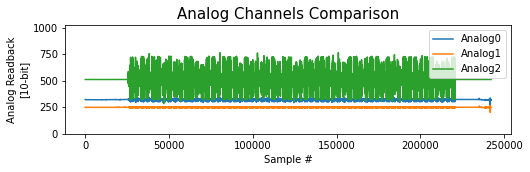

In [6]:
START_NDX = 100 # why skip initial samples?

# Make a figure to plot all analog data
plt.figure(figsize=(8,2))

for col in data.keys():
    if 'Analog' in col:
        print(f"{col} Min: {data[col][START_NDX:].min()}")
        print(f"{col} Max: {data[col][START_NDX:].max()}")
        
        # add a plot for this channel
        plt.plot(data[col][START_NDX:], label=col)


plt.title("Analog Channels Comparison", fontsize=15)
plt.legend(loc="upper right")
plt.xlabel('Sample #')
plt.ylabel('Analog Readback\n[10-bit]')
plt.ylim([0, 1023])
plt.show()

# Attempt to find the starting sample of the experiment

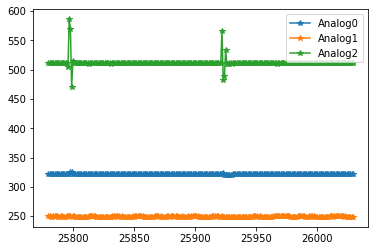

In [20]:
#TARGET_NDX = 4320 # leave some room to prevent overlapping peaks
TARGET_NDX = 25780
DURATION_NDX = 250*1

for ch in range(3):
    ch_name = f'Analog{ch}'
    ch_data = data[ch_name].iloc[TARGET_NDX:TARGET_NDX + DURATION_NDX]
    plt.plot(ch_data, '*-', label=ch_name)
    
plt.legend()

# Add triggers to a stim channel

Trigger | Description
:-- | :--
0 | nothing
1 | trial start (loud cue)
2 | loud cue
3 | soft cue
X | auto-assigned by stim wave used

## Import PsychoPy Logs

In [21]:
# Get the directory containing the current dataframe's data
subject_dir = '/'.join(file_path.split('/')[:-1])

# Grab all data files for that experiment
psychopy_csv_path = glob(subject_dir + "/psychopy_data/*.csv", recursive=True)[0]

print(f'Reading {psychopy_csv_path}...')

# Read in one subject's data
psychopy_data = pd.read_csv(psychopy_csv_path,
                            delimiter = ',', # BrainFlow files appear to use \t
                            # header=4, # row number of col names
                           )

psychopy_data.keys()

Reading ../data/exp0/OpenBCISession_2023-03-01_14-47-58/psychopy_data/andres_untitled_2023-03-01_14h54.22.320.csv...


Index(['stimuli_name', 'trials_2.thisRepN', 'trials_2.thisTrialN',
       'trials_2.thisN', 'trials_2.thisIndex', 'trials.thisRepN',
       'trials.thisTrialN', 'trials.thisN', 'trials.thisIndex',
       'Introduction.started', 'listen_instr.started', 'key_continue.started',
       'Introduction.stopped', 'key_continue.keys', 'key_continue.rt',
       'cross.started', 'cue.started', 'cross_listen.started', 'beat1.started',
       'cue.stopped', 'beat1.stopped', 'Instruction_next_trial.started',
       'Instruction_next_trial.stopped', 'cross_listen.stopped',
       'Ending.started', 'participant', 'session', 'date', 'expName',
       'psychopyVersion', 'frameRate', 'Unnamed: 31'],
      dtype='object')

## Assign event (trigger) labels based on stimuli files used

In [22]:
stim_labels = {}
stim_paths = psychopy_data['stimuli_name'].dropna().unique()
stim_paths.sort()

label = 10 # arbitrary, label>=10 would represent some stim file here
for stim_path in stim_paths:
    stim_labels[stim_path] = label
    label += 1
    
stim_labels

{'audio/exp0/kick_iso.wav': 10,
 'audio/exp0/kick_mp1.wav': 11,
 'audio/exp0/kick_mp2.wav': 12,
 'audio/exp0/snare_iso.wav': 13,
 'audio/exp0/snare_mp1.wav': 14,
 'audio/exp0/snare_mp2.wav': 15}

In [23]:
psychopy_data[['stimuli_name', 'beat1.started']]

,stimuli_name,beat1.started
0,NaN,NaN
1,audio/exp0/snare_mp1.wav,99.487031
2,audio/exp0/snare_mp2.wav,112.486925
3,audio/exp0/kick_mp1.wav,125.486612
4,audio/exp0/snare_iso.wav,138.486168
...,...,...
67,audio/exp0/snare_mp2.wav,840.485083
68,audio/exp0/snare_mp1.wav,853.484906
69,audio/exp0/kick_iso.wav,866.484654
70,NaN,NaN


## Get order of stim files from PsychoPy dump

In [24]:
stim_labels_ordered = []
stim_files_ordered = []
for stim_file in psychopy_data['stimuli_name'].dropna():
    
    label = stim_labels[stim_file]
    stim_labels_ordered.append(label)
    stim_files_ordered.append(stim_file)
    print(label, stim_file)


14 audio/exp0/snare_mp1.wav
15 audio/exp0/snare_mp2.wav
11 audio/exp0/kick_mp1.wav
13 audio/exp0/snare_iso.wav
12 audio/exp0/kick_mp2.wav
10 audio/exp0/kick_iso.wav
14 audio/exp0/snare_mp1.wav
12 audio/exp0/kick_mp2.wav
13 audio/exp0/snare_iso.wav
15 audio/exp0/snare_mp2.wav
10 audio/exp0/kick_iso.wav
11 audio/exp0/kick_mp1.wav
13 audio/exp0/snare_iso.wav
15 audio/exp0/snare_mp2.wav
12 audio/exp0/kick_mp2.wav
10 audio/exp0/kick_iso.wav
14 audio/exp0/snare_mp1.wav
11 audio/exp0/kick_mp1.wav
12 audio/exp0/kick_mp2.wav
11 audio/exp0/kick_mp1.wav
13 audio/exp0/snare_iso.wav
10 audio/exp0/kick_iso.wav
14 audio/exp0/snare_mp1.wav
15 audio/exp0/snare_mp2.wav
14 audio/exp0/snare_mp1.wav
15 audio/exp0/snare_mp2.wav
11 audio/exp0/kick_mp1.wav
13 audio/exp0/snare_iso.wav
12 audio/exp0/kick_mp2.wav
10 audio/exp0/kick_iso.wav
15 audio/exp0/snare_mp2.wav
14 audio/exp0/snare_mp1.wav
12 audio/exp0/kick_mp2.wav
13 audio/exp0/snare_iso.wav
11 audio/exp0/kick_mp1.wav
10 audio/exp0/kick_iso.wav
12 audio/e

## Find peaks in aux channel and assign trigger labels

Trial Period [samples]: 3254
#Trials: 60
Cue Peaks [indices]: [ 17 142 268 393 518 643 770 893]
Drum Peaks [indices]: [1015 1201 1261 1386 1579 1636 1701 1824 2014 2201 2264 2400 2576 2639
 2704 2826]


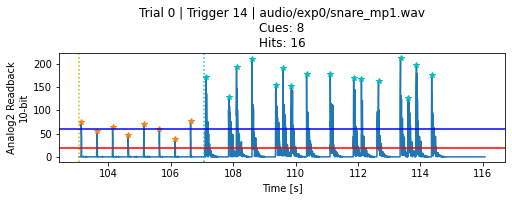

Cue Peaks [indices]: [ 17 142 267 393 517 642 768 893]
Drum Peaks [indices]: [1016 1073 1202 1393 1459 1578 1640 1774 2013 2079 2201 2389 2462 2587
 2638 2773]


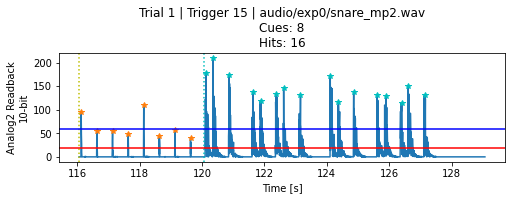

Cue Peaks [indices]: [ 18 143 267 392 518 642 768 893]
Drum Peaks [indices]: [1011 1199 1262 1387 1578 1637 1700 1825 2013 2204 2263 2388 2576 2642
 2701 2830]


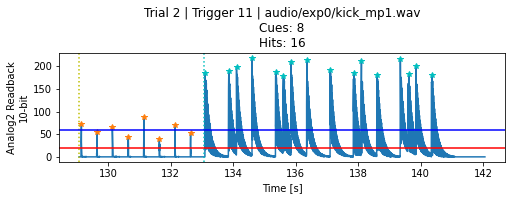

Cue Peaks [indices]: [ 15 141 265 392 517 642 766 891]
Drum Peaks [indices]: [1011 1142 1264 1388 1515 1641 1761 1886 2012 2138 2268 2396 2515 2658
 2764 2890]


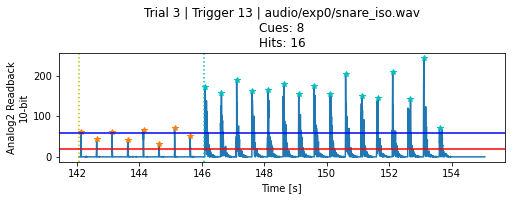

Cue Peaks [indices]: [ 17 142 268 393 518 643 768 894]
Drum Peaks [indices]: [1013 1076 1201 1389 1455 1580 1639 1768 2018 2077 2206 2390 2453 2578
 2644 2769]


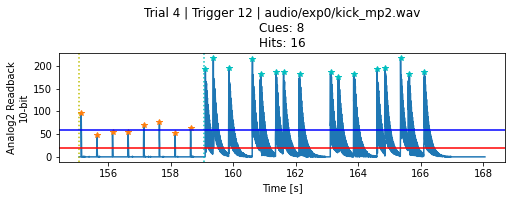

Cue Peaks [indices]: [ 14 140 265 390 515 641 765 892]
Drum Peaks [indices]: [1011 1140 1262 1387 1512 1641 1766 1891 2013 2138 2263 2388 2517 2642
 2767 2889]


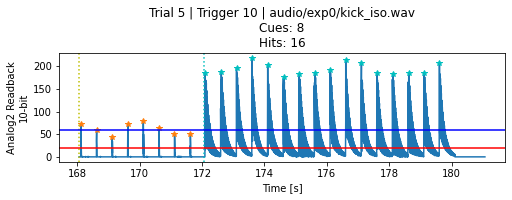

Cue Peaks [indices]: [ 17 141 266 392 517 643 767 892]
Drum Peaks [indices]: [1016 1208 1263 1399 1577 1636 1708 1824 2011 2208 2263 2390 2576 2643
 2704 2828]


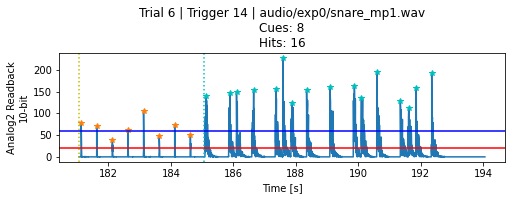

Cue Peaks [indices]: [ 16 143 267 393 517 642 768 893]
Drum Peaks [indices]: [1015 1078 1203 1391 1450 1575 1641 1763 2013 2076 2201 2392 2451 2580
 2639 2764]


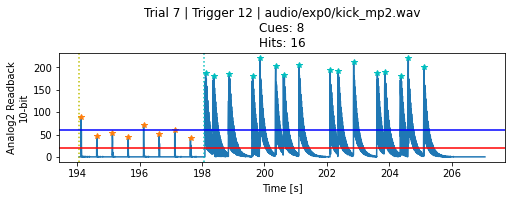

Cue Peaks [indices]: [ 16 141 267 391 517 642 767 892]
Drum Peaks [indices]: [1016 1141 1271 1398 1519 1640 1764 1889 2015 2141 2276 2388 2514 2641
 2769 2889]


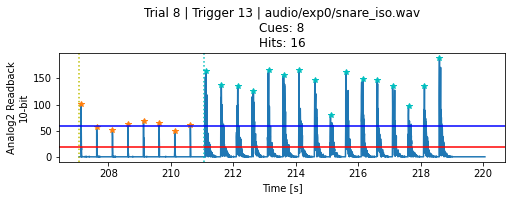

Cue Peaks [indices]: [ 16 140 265 390 516 641 766 892]
Drum Peaks [indices]: [1019 1075 1201 1391 1449 1575 1641 1763 2020 2078 2200 2395 2455 2577
 2638 2775]


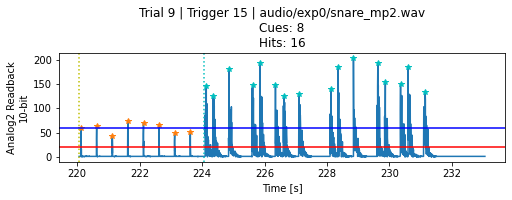

Cue Peaks [indices]: [ 16 142 267 393 517 642 768 892]
Drum Peaks [indices]: [1012 1141 1263 1388 1513 1642 1767 1892 2014 2139 2264 2389 2518 2643
 2768 2890]


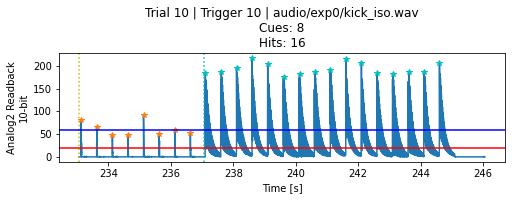

Cue Peaks [indices]: [ 16 144 267 392 518 642 769 893]
Drum Peaks [indices]: [1016 1204 1263 1388 1576 1642 1701 1826 2014 2205 2264 2393 2577 2640
 2706 2831]


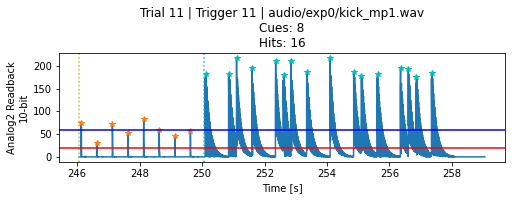

Cue Peaks [indices]: [ 18 143 268 394 519 644 770 894]
Drum Peaks [indices]: [1015 1144 1263 1398 1516 1639 1766 1890 2013 2139 2267 2397 2513 2644
 2777 2898]


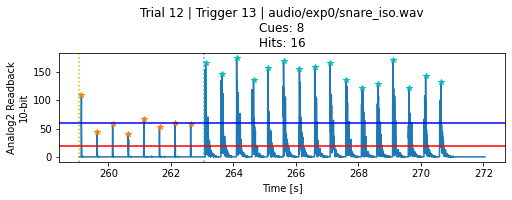

Cue Peaks [indices]: [ 15 141 267 391 516 641 766 892]
Drum Peaks [indices]: [1023 1075 1204 1388 1459 1581 1643 1772 2014 2082 2201 2393 2462 2580
 2640 2765]


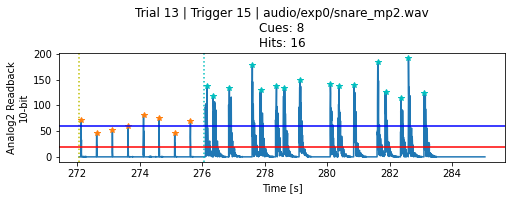

Cue Peaks [indices]: [ 16 141 267 391 516 641 767 892]
Drum Peaks [indices]: [1016 1075 1204 1388 1454 1576 1642 1767 2014 2080 2205 2393 2452 2577
 2640 2765]


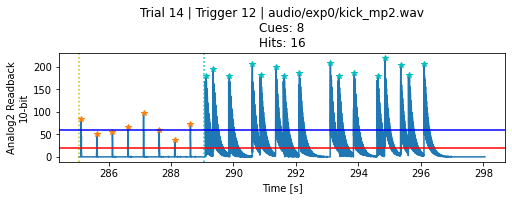

Cue Peaks [indices]: [ 17 142 268 392 517 643 768 893]
Drum Peaks [indices]: [1016 1138 1263 1392 1517 1639 1764 1889 2014 2143 2268 2390 2515 2640
 2765 2894]


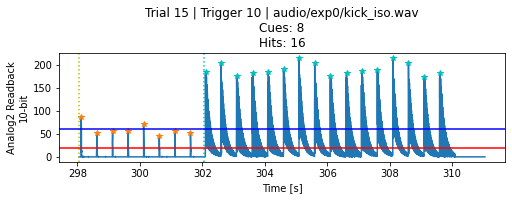

Cue Peaks [indices]: [ 16 141 267 392 518 643 767 894]
Drum Peaks [indices]: [1012 1203 1265 1392 1579 1651 1702 1828 2014 2201 2264 2389 2577 2639
 2702 2835]


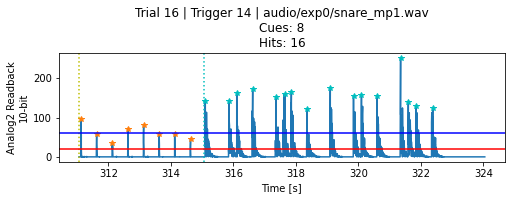

Cue Peaks [indices]: [ 17 141 267 391 516 642 767 893]
Drum Peaks [indices]: [1016 1204 1263 1388 1576 1642 1701 1826 2014 2205 2264 2393 2577 2640
 2706 2831]


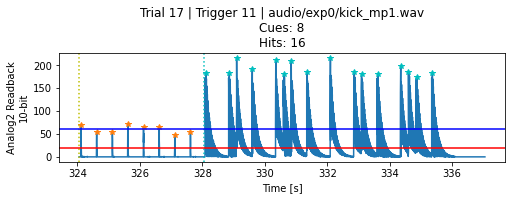

Cue Peaks [indices]: [ 18 142 267 393 517 642 768 893]
Drum Peaks [indices]: [1014 1077 1202 1390 1456 1581 1640 1765 2019 2078 2203 2391 2457 2582
 2641 2770]


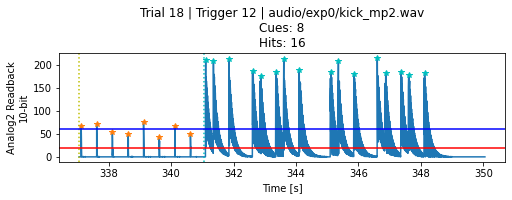

Cue Peaks [indices]: [ 16 142 266 391 517 641 766 892]
Drum Peaks [indices]: [1014 1202 1268 1390 1581 1640 1706 1828 2019 2207 2266 2391 2579 2645
 2704 2829]


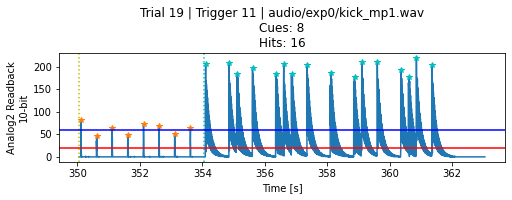

Cue Peaks [indices]: [ 15 142 266 393 517 641 767 892]
Drum Peaks [indices]: [1015 1142 1266 1391 1526 1637 1765 1888 2015 2147 2265 2409 2520 2644
 2764 2890]


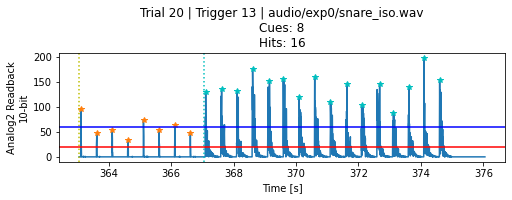

Cue Peaks [indices]: [ 18 142 268 393 519 643 768 893]
Drum Peaks [indices]: [1013 1142 1267 1389 1514 1639 1768 1893 2018 2140 2265 2390 2519 2644
 2769 2891]


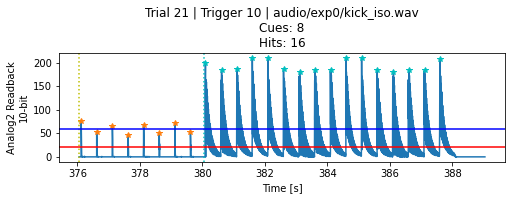

Cue Peaks [indices]: [ 17 142 266 393 517 642 767 892]
Drum Peaks [indices]: [1012 1211 1263 1392 1581 1640 1704 1832 2023 2206 2264 2393 2583 2644
 2703 2831]


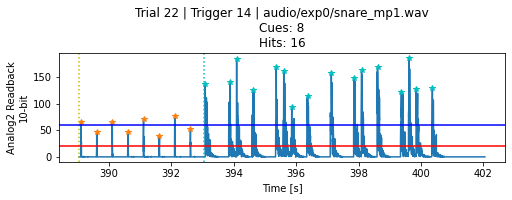

Cue Peaks [indices]: [ 17 142 267 393 519 644 768 893]
Drum Peaks [indices]: [1013 1083 1208 1402 1460 1579 1648 1764 2021 2078 2203 2389 2452 2578
 2641 2766]


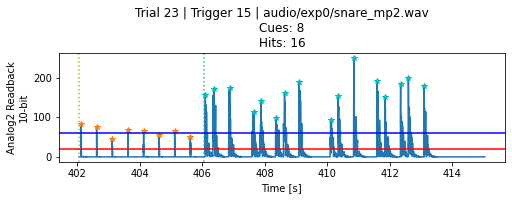

Cue Peaks [indices]: [ 18 143 268 393 519 644 769 894]
Drum Peaks [indices]: [1017 1203 1263 1389 1577 1645 1724 1829 2014 2202 2273 2398 2578 2654
 2710 2833]


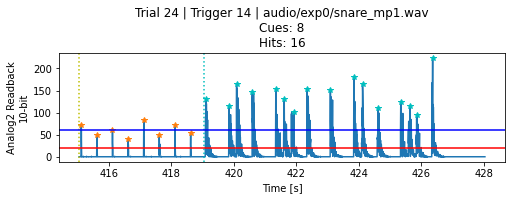

Cue Peaks [indices]: [ 18 143 268 393 519 644 769 894]
Drum Peaks [indices]: [1015 1075 1201 1397 1451 1576 1643 1765 2016 2081 2202 2391 2459 2578
 2646 2766]


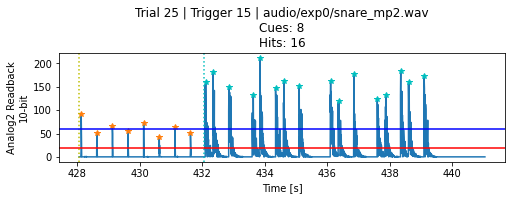

Cue Peaks [indices]: [ 19 144 270 394 520 645 771 895]
Drum Peaks [indices]: [1017 1205 1264 1389 1577 1643 1702 1827 2015 2206 2265 2394 2578 2641
 2707 2832]


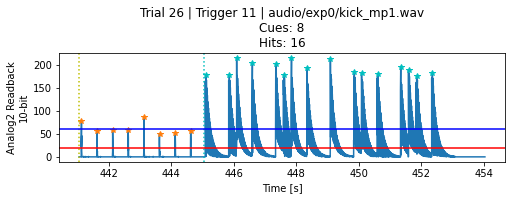

Cue Peaks [indices]: [ 19 144 268 395 519 645 769 894]
Drum Peaks [indices]: [1017 1151 1272 1399 1517 1644 1775 1894 2022 2141 2274 2392 2517 2642
 2768 2893]


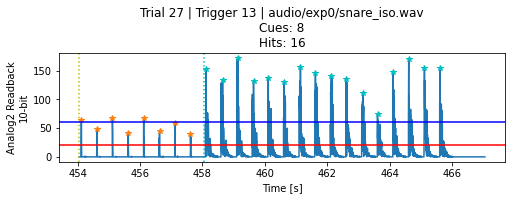

Cue Peaks [indices]: [ 17 144 268 394 518 644 768 894]
Drum Peaks [indices]: [1014 1077 1202 1390 1456 1581 1640 1765 2019 2078 2207 2391 2457 2579
 2645 2770]


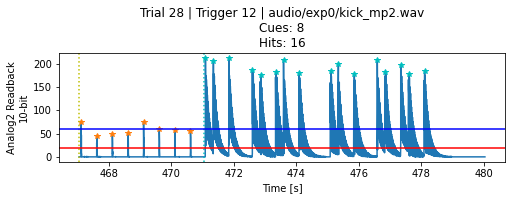

Cue Peaks [indices]: [ 18 144 268 394 519 644 769 895]
Drum Peaks [indices]: [1018 1140 1265 1390 1515 1644 1769 1891 2016 2141 2266 2395 2520 2645
 2767 2892]


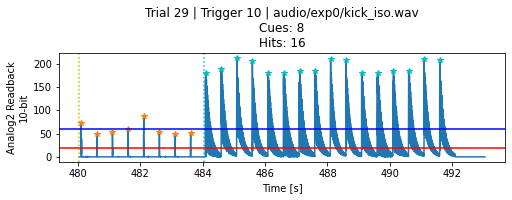

Cue Peaks [indices]: [ 22 146 272 396 521 647 773 897]
Drum Peaks [indices]: [1019 1080 1212 1400 1453 1582 1652 1767 2016 2079 2215 2398 2457 2581
 2645 2775]


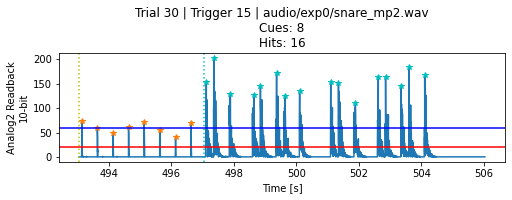

Cue Peaks [indices]: [ 18 144 268 395 518 643 769 894]
Drum Peaks [indices]: [1023 1215 1265 1390 1577 1642 1702 1828 2027 2203 2275 2393 2578 2643
 2709 2830]


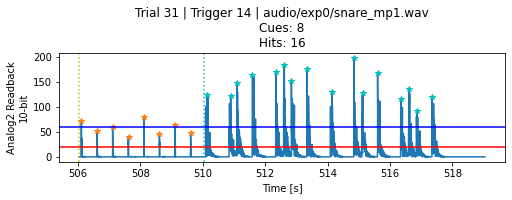

Cue Peaks [indices]: [ 19 143 268 393 519 644 769 895]
Drum Peaks [indices]: [1017 1083 1205 1396 1455 1580 1643 1768 2022 2081 2206 2394 2460 2585
 2644 2769]


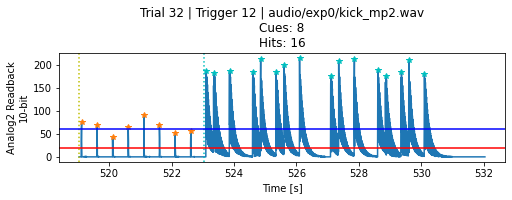

Cue Peaks [indices]: [ 21 145 271 395 521 645 770 896]
Drum Peaks [indices]: [1019 1140 1267 1394 1525 1647 1767 1890 2017 2151 2280 2404 2518 2642
 2770 2893]


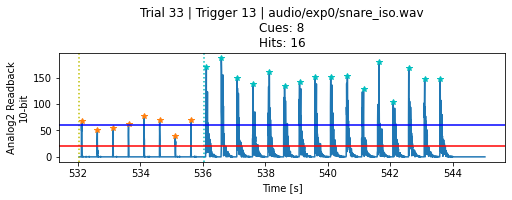

Cue Peaks [indices]: [ 18 144 269 395 519 644 770 894]
Drum Peaks [indices]: [1019 1207 1266 1395 1579 1642 1704 1833 2017 2205 2271 2396 2584 2643
 2709 2834]


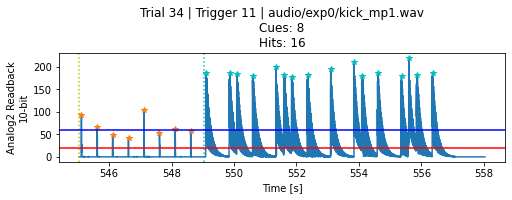

Cue Peaks [indices]: [ 19 145 269 396 520 646 770 896]
Drum Peaks [indices]: [1016 1145 1270 1395 1517 1642 1767 1896 2021 2146 2268 2393 2518 2647
 2772 2897]


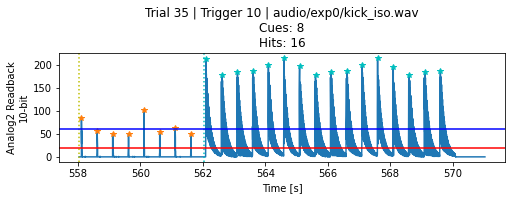

Cue Peaks [indices]: [ 21 146 272 397 522 647 773 897]
Drum Peaks [indices]: [1020 1079 1208 1392 1458 1580 1646 1771 2018 2084 2209 2397 2456 2581
 2647 2769]


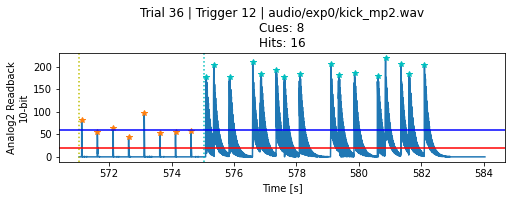

Cue Peaks [indices]: [ 22 146 272 396 521 646 773 897]
Drum Peaks [indices]: [1021 1091 1215 1395 1454 1579 1642 1772 2028 2085 2206 2403 2460 2584
 2647 2776]


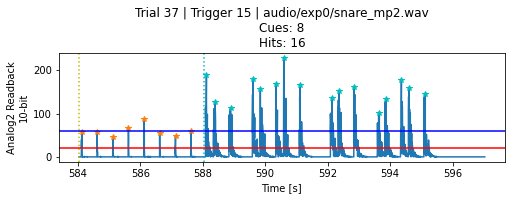

Cue Peaks [indices]: [ 23 148 274 399 524 649 775 899]
Drum Peaks [indices]: [1020 1212 1279 1395 1584 1647 1709 1834 2023 2214 2271 2404 2585 2655
 2716 2842]


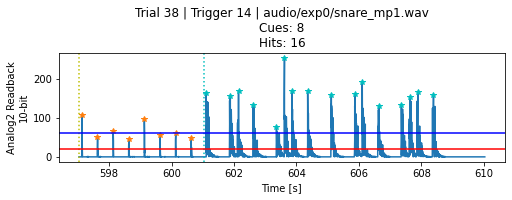

Cue Peaks [indices]: [ 25 149 274 399 524 649 776 900]
Drum Peaks [indices]: [1032 1149 1270 1406 1528 1645 1783 1909 2023 2159 2271 2399 2522 2653
 2777 2910]


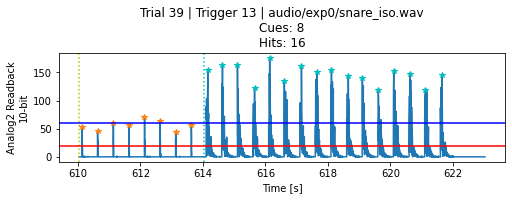

Cue Peaks [indices]: [ 20 145 271 396 522 646 771 897]
Drum Peaks [indices]: [1018 1143 1272 1397 1522 1644 1769 1894 2023 2148 2273 2395 2520 2645
 2774 2899]


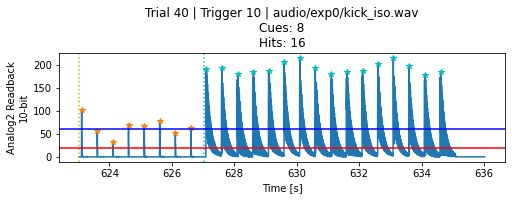

Cue Peaks [indices]: [ 20 146 270 396 521 647 771 898]
Drum Peaks [indices]: [1021 1209 1275 1397 1588 1647 1713 1835 2026 2214 2273 2398 2586 2652
 2711 2836]


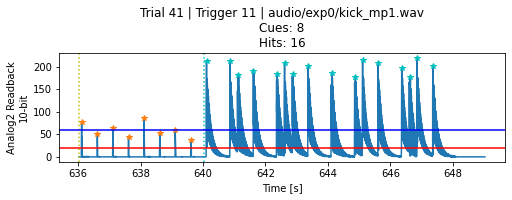

Cue Peaks [indices]: [ 24 148 274 399 524 649 774 899]
Drum Peaks [indices]: [1024 1083 1208 1399 1466 1585 1646 1772 2034 2094 2215 2398 2464 2598
 2653 2777]


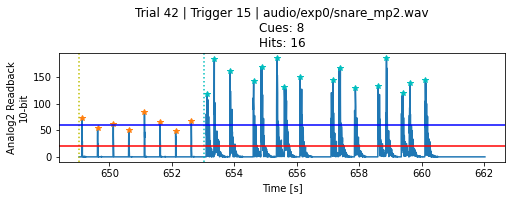

Cue Peaks [indices]: [ 25 151 275 400 525 651 776 901]
Drum Peaks [indices]: [1023 1143 1273 1393 1520 1644 1770 1894 2021 2150 2277 2398 2531 2645
 2772 2900]


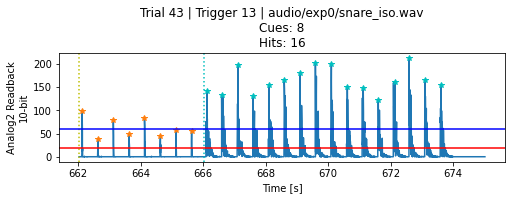

Cue Peaks [indices]: [ 22 147 272 397 522 647 772 898]
Drum Peaks [indices]: [1019 1082 1207 1398 1457 1586 1645 1770 2024 2083 2208 2396 2462 2587
 2646 2775]


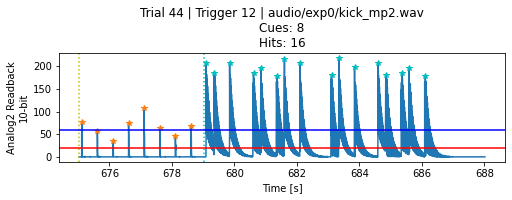

Cue Peaks [indices]: [ 20 146 270 397 522 646 772 896]
Drum Peaks [indices]: [1021 1209 1272 1397 1588 1647 1710 1835 2026 2214 2273 2398 2586 2652
 2711 2836]


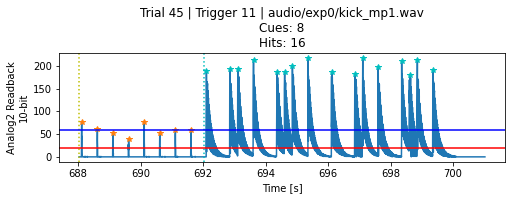

Cue Peaks [indices]: [ 26 150 275 401 526 651 776 902]
Drum Peaks [indices]: [1021 1214 1276 1398 1596 1647 1710 1839 2030 2218 2273 2407 2585 2652
 2710 2838]


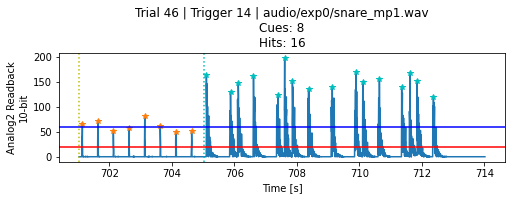

In [ ]:
# Find onsets (peaks)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

# Cyton params
FS_EEG = 250

# PsychoPy params
NUM_CONDITIONS = 2 # kick vs snare
NUM_SYNCOPATIONS = 3 # iso, mp1, mp2
NUM_REPS = 10

CUE_DUR = 4 # seconds
DRUMS_DUR = 8 # seconds
WAIT_DUR = 1 # second
LAG_EST = 4/FS_EEG # seconds
# There seems to be an extra lag with every trial.
# The cue peaks keep sliding forward if LAG_EST is 0.
# 5 is too much

# Hand-tuned peak finding params
CUE_HEIGHT = 20
DRUMS_HEIGHT = 60
IOI_CUE = 0.2 * FS_EEG
IOI_DRUMS = 0.2 * FS_EEG

# Calculated params
period = int(FS_EEG*(CUE_DUR + DRUMS_DUR + WAIT_DUR + LAG_EST))
print('Trial Period [samples]:', period)

# num_trials = 56 # subject0's data collection ended early (battery died)
num_trials = NUM_CONDITIONS * NUM_SYNCOPATIONS * NUM_REPS
print('#Trials:', num_trials)

START_NDX = int(TARGET_NDX) # make a copy of the exp start index eyeballed above

stim_channel = [0]*len(data)

for trial in range(num_trials):
    
    # Get sample times (how accurate are these?)
    t = data['Timestamp'].iloc[START_NDX:START_NDX + period]
    t = np.array(t) # make a numpy copy
    t -= data['Timestamp'].iloc[0] # start at t=0 

    # Get corresponding aux channel with audio
    analog2 = data['Analog2'].iloc[START_NDX:START_NDX + period]
    analog2 = np.array(analog2)
    analog2 = analog2 - analog2.mean()
    analog2 = np.abs(analog2) # in case we miss a negative peak

    # Look for peaks in the cue segment
    cue = np.copy(analog2[:FS_EEG*CUE_DUR]) # first four seconds is the metronome
    peaks_cue, _ = find_peaks(
        cue, # only use one of the two channels
        height=CUE_HEIGHT, # the smaller metronome blips also exceed 0.5
        distance=IOI_CUE, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
    )
    
    # Look for peaks in the drum segment
    drums = np.copy(analog2[FS_EEG*CUE_DUR:])
    peaks_drums, _ = find_peaks(
        drums, # only use one of the two channels
        height=DRUMS_HEIGHT, # the smaller metronome blips also exceed 0.5
        distance=IOI_DRUMS, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
    )
    
    peaks_drums += FS_EEG*CUE_DUR # offset by start time
    
    # Collect peaks
    peaks = []
    peaks.extend(peaks_cue)
    peaks.extend(peaks_drums)
    
    print('Cue Peaks [indices]:', peaks_cue)
    print('Drum Peaks [indices]:', peaks_drums)
    
    # Plot peaks for cue
    plt.figure(figsize=(8,2))
    plt.plot(t, analog2, '-')
    plt.plot(t[peaks_cue], analog2[peaks_cue], '*')
    plt.plot(t[peaks_drums], analog2[peaks_drums], 'c*')
    plt.axvline(x=t[0], c='y', linestyle=':')
    plt.axvline(x=t[0] + CUE_DUR, c='c', linestyle=':')
    plt.axhline(y=CUE_HEIGHT, c='r')
    plt.axhline(y=DRUMS_HEIGHT, c='b')
    
    trigger_label = stim_labels_ordered[trial]
    stim_file = stim_files_ordered[trial]
    title_str = f'Trial {trial} | Trigger {trigger_label} | {stim_file}'
    title_str += f'\nCues: {len(peaks_cue)}\nHits: {len(peaks_drums)}'
    plt.title(title_str)
    plt.xlabel('Time [s]')
    plt.ylabel('Analog2 Readback\n10-bit')
    plt.show()
    
    # Add trigger labels
    p_onset = peaks_cue[0] + START_NDX
    stim_channel[p_onset] = 1 # 1 for trial start (loud cue)
    
    p_onset = peaks_cue[4] + START_NDX
    stim_channel[p_onset] = 2 # 2 for loud cue
    
    soft_cues = [1, 2, 3, 5, 6, 7]
    for p in peaks_cue[soft_cues]:
        p_onset = p + START_NDX
        stim_channel[p_onset] = 3 # 3 for soft cue
    
    for p in peaks_drums:
        p_onset = p + START_NDX
        stim_channel[p_onset] = trigger_label
        
    # update for next trial
    START_NDX += period
    
data['stim'] = stim_channel # make a stim channel

<AxesSubplot: >

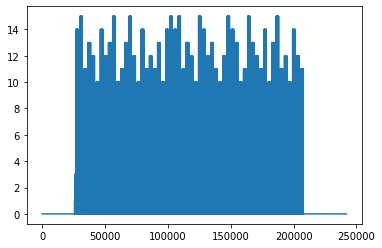

In [26]:
data['stim'].plot()

In [27]:
data.keys()

Index(['EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7',
       'Analog0', 'Analog1', 'Analog2', 'Timestamp', 'stim'],
      dtype='object')

# Write dataframe out

In [28]:
filname = f'{exp}_sub{subject_ID}_8ch_1stim.csv'
data.to_csv(filname)